In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from traceUtils import *
import numpy as np
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.formula.api import mixedlm
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import cross_validate, cross_val_score, GroupKFold
import sys
import os
from operator import itemgetter
import pickle
import json
import subprocess
from datetime import datetime
import glob
import sys
from numpy.linalg import LinAlgError

from drl_model_predictions import *

# sys.path.append('../neural_analysis')
# from analysis_by_class import compute_lme_pval, zero_runs

sys.path.append('../utils')
from plotting import *
from paths import *
from db import *
from protocols import *
from matio import loadmat

In [2]:
plt.style.use('paper_export')

In [3]:
# def compute_lme_pval(mfit):
#     # the above doesn't give enough sig figs, so copied the actual p-value computation from statsmodels source
#     sdf = np.nan * np.ones((mfit.k_fe + mfit.k_re2 + mfit.k_vc, 6))
#     # Coefficient estimates
#     sdf[0:mfit.k_fe, 0] = mfit.fe_params
#     # Standard errors
#     sdf[0:mfit.k_fe, 1] = np.sqrt(np.diag(mfit.cov_params()[0:mfit.k_fe]))
#     # Z-scores
#     sdf[0:mfit.k_fe, 2] = sdf[0:mfit.k_fe, 0] / sdf[0:mfit.k_fe, 1]
#     # p-values
#     pval = (2 * stats.norm.cdf(-np.abs(sdf[0:mfit.k_fe, 2])))
#     return pval

def fitp(formula, df, inds, do_print=False, re_formula=None):
    with warnings.catch_warnings():
        warnings.simplefilter('ignore')
        try:
            model = mixedlm(formula, df, groups='name', re_formula=re_formula)
            mfit = model.fit(method=['powell', 'lbfgs'], maxiter=2000)
        except LinAlgError:
            return 1
        
    if do_print:
        print(inds)
        print(mfit.summary())
    
#     p = mfit.summary().tables[1]['P>|z|'][inds]
    p = compute_lme_pval(mfit)[inds]
    if hasattr(inds, '__len__'):
        return p.astype(np.float64)
    elif p == '':
        return 1
    else:
        return float(p)

# Formal model comparisons

In [4]:
# protocol = 'SameVarMaxSkewness'
protocol = 'SameRewDist'
# protocol = 'SameRewVar'
colors, protocol_info, periods, kwargs = load_params(protocol)
opt_palette = {'Pessimistic': '#BA55D3', 'Optimistic': '#0047AB'}
n_trace_types = protocol_info['n_trace_types']

In [5]:
df_list, code_order, info, reduced_activities, all_dists, all_rda = generate_model_predictions(protocol_info, colors, cat=True,
                                                                                               n_components=2, noise_scale=0, plot_detail=True)

2.0
[-1.  1.  3.  5.  7.]
1.0
[0. 2. 4. 6.]
[array([1., 0., 0., 0.]), array([0., 0., 1., 0.]), array([0. , 0.5, 0. , 0.5])]
[0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95]
[0 1]
[2 3]
[[0.17391304 0.4137931  0.57142857 0.68292683 0.76595745 0.83018868
  0.88135593 0.92307692 0.95774648 0.98701299]
 [0.01298701 0.04225352 0.07692308 0.11864407 0.16981132 0.23404255
  0.31707317 0.42857143 0.5862069  0.82608696]]
Reflected Expectile
[0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95]
(1000, 6)
50
(1000, 300)
100 10 50 6
(1000, 300)
[[  0.           0.         125.03620786 125.03620786 130.64807747
  130.64807747]
 [  0.           0.         125.03620786 125.03620786 130.64807747
  130.64807747]
 [125.03620786 125.03620786   0.           0.           5.61186961
    5.61186961]
 [125.03620786 125.03620786   0.           0.           5.61186961
    5.61186961]
 [130.64807747 130.64807747   5.61186961   5.61186961   0.
    0.        ]
 [130.64807747 130.64807747   5.61186961   5.61186961

/n/holystore01/LABS/uchida_users/Users/alowet/dist-rl/behavior_analysis/drl_model_predictions.py:531: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(order, rotation=45, ha='right', rotation_mode='anchor')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/n/holystore01/LABS/uchida_users/Users/alowet/dist-rl/behavior_analysis/drl_model_predictions.py:562: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
meta NOT subset; don't know how to subset; dropped


Expectile
[0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95]
(1000, 6)
50
(1000, 300)
100 10 50 6
(1000, 300)
[[  0.           0.         125.03620786 125.03620786 130.64807747
  130.64807747]
 [  0.           0.         125.03620786 125.03620786 130.64807747
  130.64807747]
 [125.03620786 125.03620786   0.           0.           5.61186961
    5.61186961]
 [125.03620786 125.03620786   0.           0.           5.61186961
    5.61186961]
 [130.64807747 130.64807747   5.61186961   5.61186961   0.
    0.        ]
 [130.64807747 130.64807747   5.61186961   5.61186961   0.
    0.        ]]
[[ 0.          0.         19.12973402 19.12973402 16.76615819 16.76615819]
 [ 0.          0.         19.12973402 19.12973402 16.76615819 16.76615819]
 [19.12973402 19.12973402  0.          0.         35.89589221 35.89589221]
 [19.12973402 19.12973402  0.          0.         35.89589221 35.89589221]
 [16.76615819 16.76615819 35.89589221 35.89589221  0.          0.        ]
 [16.76615819 16.76615819 35.89

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x147134232c20> (for post_execute):


KeyboardInterrupt: 

2.0
[-1.  1.  3.  5.  7.]
1.0
[0. 2. 4. 6.]
[array([1., 0., 0., 0.]), array([0., 0., 1., 0.]), array([0. , 0.5, 0. , 0.5])]
[0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95]
[0 1]
[2 3]
[[0.17391304 0.4137931  0.57142857 0.68292683 0.76595745 0.83018868
  0.88135593 0.92307692 0.95774648 0.98701299]
 [0.01298701 0.04225352 0.07692308 0.11864407 0.16981132 0.23404255
  0.31707317 0.42857143 0.5862069  0.82608696]]
Reflected Expectile
[0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95]
(1000, 6)
50
(1000, 300)
100 10 50 6
(1000, 300)
[[0.00000000e+00 3.18941539e+00 1.33894248e+02 1.34083234e+02
  1.38629408e+02 1.38564338e+02]
 [3.18941539e+00 0.00000000e+00 1.30704833e+02 1.30893819e+02
  1.35439993e+02 1.35374923e+02]
 [1.33894248e+02 1.30704833e+02 0.00000000e+00 1.88985980e-01
  4.73516038e+00 4.67008994e+00]
 [1.34083234e+02 1.30893819e+02 1.88985980e-01 0.00000000e+00
  4.54617440e+00 4.48110396e+00]
 [1.38629408e+02 1.35439993e+02 4.73516038e+00 4.54617440e+00
  0.00000000e+00 6

/n/holystore01/LABS/uchida_users/Users/alowet/dist-rl/behavior_analysis/drl_model_predictions.py:531: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(order, rotation=45, ha='right', rotation_mode='anchor')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/n/holystore01/LABS/uchida_users/Users/alowet/dist-rl/behavior_analysis/drl_model_predictions.py:562: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
meta NOT subset; don't know how to subset; dropped


Expectile
[0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95]
(1000, 6)
50
(1000, 300)
100 10 50 6
(1000, 300)
[[  0.           2.46304058 129.81704577 130.96656479 138.08324014
  134.8367479 ]
 [  2.46304058   0.         132.28008636 133.42960537 140.54628072
  137.29978848]
 [129.81704577 132.28008636   0.           1.14951901   8.26619437
    5.01970212]
 [130.96656479 133.42960537   1.14951901   0.           7.11667535
    3.87018311]
 [138.08324014 140.54628072   8.26619437   7.11667535   0.
    3.24649224]
 [134.8367479  137.29978848   5.01970212   3.87018311   3.24649224
    0.        ]]
[[ 0.          9.24399071 33.16588219 35.69737307 18.10294823 24.74025386]
 [ 9.24399071  0.         23.92189148 26.45338236 27.34693894 33.98424457]
 [33.16588219 23.92189148  0.          2.53149088 51.26883042 57.90613605]
 [35.69737307 26.45338236  2.53149088  0.         53.8003213  60.43762693]
 [18.10294823 27.34693894 51.26883042 53.8003213   0.          6.63730563]
 [24.74025386 33.984244

/n/holystore01/LABS/uchida_users/Users/alowet/dist-rl/behavior_analysis/drl_model_predictions.py:531: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(order, rotation=45, ha='right', rotation_mode='anchor')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/n/holystore01/LABS/uchida_users/Users/alowet/dist-rl/behavior_analysis/drl_model_predictions.py:562: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
meta NOT subset; don't know how to subset; dropped


Quantile
[0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95]
(1000, 6)
50
(1000, 300)
100 10 50 6
(1000, 300)
[[  0.           1.10075393 126.89392452 130.79867559 147.42431839
  150.00352526]
 [  1.10075393   0.         125.79317059 129.69792166 146.32356446
  148.90277133]
 [126.89392452 125.79317059   0.           3.90475107  20.53039388
   23.10960074]
 [130.79867559 129.69792166   3.90475107   0.          16.6256428
   19.20484967]
 [147.42431839 146.32356446  20.53039388  16.6256428    0.
    2.57920687]
 [150.00352526 148.90277133  23.10960074  19.20484967   2.57920687
    0.        ]]
[[ 0.          8.56631211 50.91886975 54.56857373 26.86889688 27.30800643]
 [ 8.56631211  0.         42.35255764 46.00226162 35.43520899 35.87431854]
 [50.91886975 42.35255764  0.          3.64970398 77.78776662 78.22687618]
 [54.56857373 46.00226162  3.64970398  0.         81.4374706  81.87658016]
 [26.86889688 35.43520899 77.78776662 81.4374706   0.          0.43910955]
 [27.30800643 35.87431854

/n/holystore01/LABS/uchida_users/Users/alowet/dist-rl/behavior_analysis/drl_model_predictions.py:531: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(order, rotation=45, ha='right', rotation_mode='anchor')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/n/holystore01/LABS/uchida_users/Users/alowet/dist-rl/behavior_analysis/drl_model_predictions.py:562: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
meta NOT subset; don't know how to subset; dropped


Reflected Quantile
[0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95]
(1000, 6)
50
(1000, 300)
100 10 50 6
(1000, 300)
[[  0.           4.59627309 130.9542406  132.00816609 150.79110992
  147.3225497 ]
 [  4.59627309   0.         126.35796751 127.411893   146.19483683
  142.72627661]
 [130.9542406  126.35796751   0.           1.05392549  19.83686932
   16.3683091 ]
 [132.00816609 127.411893     1.05392549   0.          18.78294383
   15.31438362]
 [150.79110992 146.19483683  19.83686932  18.78294383   0.
    3.46856022]
 [147.3225497  142.72627661  16.3683091   15.31438362   3.46856022
    0.        ]]
[[ 0.          2.32775529 49.79661471 43.3536707  32.15144861 27.0778458 ]
 [ 2.32775529  0.         47.46885941 41.02591541 34.47920391 29.40560109]
 [49.79661471 47.46885941  0.          6.44294401 81.94806332 76.87446051]
 [43.3536707  41.02591541  6.44294401  0.         75.50511931 70.4315165 ]
 [32.15144861 34.47920391 81.94806332 75.50511931  0.          5.07360281]
 [27.0778458  

/n/holystore01/LABS/uchida_users/Users/alowet/dist-rl/behavior_analysis/drl_model_predictions.py:531: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(order, rotation=45, ha='right', rotation_mode='anchor')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/n/holystore01/LABS/uchida_users/Users/alowet/dist-rl/behavior_analysis/drl_model_predictions.py:562: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
meta NOT subset; don't know how to subset; dropped


Distributed AU
[0.05 0.05 0.15 0.15 0.25 0.25 0.35 0.35 0.45 0.45 0.55 0.55 0.65 0.65
 0.75 0.75 0.85 0.85 0.95 0.95]
(2000, 6)
50
(2000, 300)
100 20 50 6
(2000, 300)
[[  0.           1.83084528  89.3980256   97.82186838 361.37562019
  362.24478015]
 [  1.83084528   0.          87.56718032  95.99102311 359.54477491
  360.41393487]
 [ 89.3980256   87.56718032   0.           8.42384279 271.97759459
  272.84675455]
 [ 97.82186838  95.99102311   8.42384279   0.         263.5537518
  264.42291176]
 [361.37562019 359.54477491 271.97759459 263.5537518    0.
    0.86915996]
 [362.24478015 360.41393487 272.84675455 264.42291176   0.86915996
    0.        ]]
[[  0.           9.3003897  124.69857243 125.65966313  19.75546355
   43.35642435]
 [  9.3003897    0.         133.99896214 134.96005284  29.05585326
   52.65681406]
 [124.69857243 133.99896214   0.           0.9610907  104.94310888
   81.34214808]
 [125.65966313 134.96005284   0.9610907    0.         105.90419958
   82.30323878]
 [ 19.75546

/n/holystore01/LABS/uchida_users/Users/alowet/dist-rl/behavior_analysis/drl_model_predictions.py:531: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(order, rotation=45, ha='right', rotation_mode='anchor')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/n/holystore01/LABS/uchida_users/Users/alowet/dist-rl/behavior_analysis/drl_model_predictions.py:562: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
meta NOT subset; don't know how to subset; dropped


Partial Distributed AU
[0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95 0.05 0.15 0.25 0.35
 0.45 0.55 0.65 0.75 0.85 0.95]
(2000, 6)
50
(2000, 300)
100 20 50 6
(2000, 300)
[[  0.           2.50628591  84.26665792  85.7508343  358.1676589
  358.59171729]
 [  2.50628591   0.          81.76037201  83.2445484  355.66137299
  356.08543138]
 [ 84.26665792  81.76037201   0.           1.48417639 273.90100098
  274.32505937]
 [ 85.7508343   83.2445484    1.48417639   0.         272.4168246
  272.84088299]
 [358.1676589  355.66137299 273.90100098 272.4168246    0.
    0.42405839]
 [358.59171729 356.08543138 274.32505937 272.84088299   0.42405839
    0.        ]]
[[  0.           9.37611716 136.89573454 131.65696705  32.8006737
   54.4607534 ]
 [  9.37611716   0.         127.51961738 122.28084989  23.42455654
   45.08463625]
 [136.89573454 127.51961738   0.           5.23876749 104.09506084
   82.43498114]
 [131.65696705 122.28084989   5.23876749   0.          98.85629335
   77.19621364]
 [ 32

/n/holystore01/LABS/uchida_users/Users/alowet/dist-rl/behavior_analysis/drl_model_predictions.py:531: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(order, rotation=45, ha='right', rotation_mode='anchor')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/n/holystore01/LABS/uchida_users/Users/alowet/dist-rl/behavior_analysis/drl_model_predictions.py:562: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
meta NOT subset; don't know how to subset; dropped


Actor Uncertainty (AU)
[0.5 0.5]
(200, 6)
50
(200, 300)
100 2 50 6
(200, 300)
[[  0.          15.12436147  17.38076563  17.69180874 135.73370305
  134.92804957]
 [ 15.12436147   0.          32.5051271   32.81617021 150.85806453
  150.05241104]
 [ 17.38076563  32.5051271    0.           0.31104311 118.35293743
  117.54728394]
 [ 17.69180874  32.81617021   0.31104311   0.         118.04189432
  117.23624083]
 [135.73370305 150.85806453 118.35293743 118.04189432   0.
    0.80565349]
 [134.92804957 150.05241104 117.54728394 117.23624083   0.80565349
    0.        ]]
[[ 0.         23.06368764 65.46690771 50.59943098 32.07481896 26.06492338]
 [23.06368764  0.         42.40322006 27.53574333  9.01113132  3.00123573]
 [65.46690771 42.40322006  0.         14.86747673 33.39208874 39.40198433]
 [50.59943098 27.53574333 14.86747673  0.         18.52461201 24.5345076 ]
 [32.07481896  9.01113132 33.39208874 18.52461201  0.          6.00989558]
 [26.06492338  3.00123573 39.40198433 24.5345076   6.009

/n/holystore01/LABS/uchida_users/Users/alowet/dist-rl/behavior_analysis/drl_model_predictions.py:531: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(order, rotation=45, ha='right', rotation_mode='anchor')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/n/holystore01/LABS/uchida_users/Users/alowet/dist-rl/behavior_analysis/drl_model_predictions.py:562: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
meta NOT subset; don't know how to subset; dropped


Categorical
[0. 2. 4. 6.]
(400, 6)
50
(400, 300)
100 4 50 6
(400, 300)
[[ 0.          0.12607904 15.22515977 15.34246792  7.58291785  7.51258901]
 [ 0.12607904  0.         15.35123881 15.46854696  7.70899689  7.63866805]
 [15.22515977 15.35123881  0.          0.11730815  7.64224192  7.71257077]
 [15.34246792 15.46854696  0.11730815  0.          7.75955007  7.82987891]
 [ 7.58291785  7.70899689  7.64224192  7.75955007  0.          0.07032884]
 [ 7.51258901  7.63866805  7.71257077  7.82987891  0.07032884  0.        ]]
[[ 0.          0.27405257  0.41129178  0.56346095 10.92206093 10.58857767]
 [ 0.27405257  0.          0.68534435  0.28940838 11.19611351 10.86263024]
 [ 0.41129178  0.68534435  0.          0.97475273 10.51076915 10.17728589]
 [ 0.56346095  0.28940838  0.97475273  0.         11.48552188 11.15203862]
 [10.92206093 11.19611351 10.51076915 11.48552188  0.          0.33348327]
 [10.58857767 10.86263024 10.17728589 11.15203862  0.33348327  0.        ]]
(2, 400)
(4, 2) (4,)
[0. 2.

/n/holystore01/LABS/uchida_users/Users/alowet/dist-rl/behavior_analysis/drl_model_predictions.py:531: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(order, rotation=45, ha='right', rotation_mode='anchor')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/n/holystore01/LABS/uchida_users/Users/alowet/dist-rl/behavior_analysis/drl_model_predictions.py:562: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
meta NOT subset; don't know how to subset; dropped


Laplace
[0. 2. 4. 6.]
(400, 6)
50
(400, 300)
100 4 50 6
(400, 300)
[[ 0.          0.12259185 15.35536234 14.47757063 12.370853   12.74838445]
 [ 0.12259185  0.         15.23277049 14.35497878 12.24826115 12.6257926 ]
 [15.35536234 15.23277049  0.          0.87779172  2.98450935  2.60697789]
 [14.47757063 14.35497878  0.87779172  0.          2.10671763  1.72918618]
 [12.370853   12.24826115  2.98450935  2.10671763  0.          0.37753145]
 [12.74838445 12.6257926   2.60697789  1.72918618  0.37753145  0.        ]]
[[0.         0.86627333 3.41842636 2.42263875 5.91148354 6.42341449]
 [0.86627333 0.         4.28469969 3.28891207 5.04521021 5.55714117]
 [3.41842636 4.28469969 0.         0.99578761 9.3299099  9.84184086]
 [2.42263875 3.28891207 0.99578761 0.         8.33412228 8.84605324]
 [5.91148354 5.04521021 9.3299099  8.33412228 0.         0.51193096]
 [6.42341449 5.55714117 9.84184086 8.84605324 0.51193096 0.        ]]
(2, 400)
(4, 2) (4,)
[0. 2. 4. 6.]
(400, 6)
50
(400, 300)
100 4 50 

/n/holystore01/LABS/uchida_users/Users/alowet/dist-rl/behavior_analysis/drl_model_predictions.py:531: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(order, rotation=45, ha='right', rotation_mode='anchor')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/n/holystore01/LABS/uchida_users/Users/alowet/dist-rl/behavior_analysis/drl_model_predictions.py:562: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
meta NOT subset; don't know how to subset; dropped


Cumulative
[0. 2. 4. 6.]
(400, 6)
50
(400, 300)
100 4 50 6
(400, 300)
[[0.00000000e+00 4.93470334e-02 1.55155292e+01 1.55265215e+01
  1.29172413e+01 1.26367306e+01]
 [4.93470334e-02 0.00000000e+00 1.54661822e+01 1.54771744e+01
  1.28678943e+01 1.25873836e+01]
 [1.55155292e+01 1.54661822e+01 0.00000000e+00 1.09922476e-02
  2.59828791e+00 2.87879861e+00]
 [1.55265215e+01 1.54771744e+01 1.09922476e-02 0.00000000e+00
  2.60928016e+00 2.88979086e+00]
 [1.29172413e+01 1.28678943e+01 2.59828791e+00 2.60928016e+00
  0.00000000e+00 2.80510700e-01]
 [1.26367306e+01 1.25873836e+01 2.87879861e+00 2.88979086e+00
  2.80510700e-01 0.00000000e+00]]
[[ 0.          0.32230004  2.22059503  3.58125965  6.56189755  4.84974216]
 [ 0.32230004  0.          2.54289507  3.90355969  6.23959751  4.52744212]
 [ 2.22059503  2.54289507  0.          1.36066462  8.78249258  7.07033718]
 [ 3.58125965  3.90355969  1.36066462  0.         10.1431572   8.43100181]
 [ 6.56189755  6.23959751  8.78249258 10.1431572   0.      

/n/holystore01/LABS/uchida_users/Users/alowet/dist-rl/behavior_analysis/drl_model_predictions.py:531: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(order, rotation=45, ha='right', rotation_mode='anchor')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/n/holystore01/LABS/uchida_users/Users/alowet/dist-rl/behavior_analysis/drl_model_predictions.py:562: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
meta NOT subset; don't know how to subset; dropped


Moments
[0.5 0.5]
(200, 6)
50
(200, 300)
100 2 50 6
(200, 300)
[[0.00000000e+00 2.13068322e-02 2.71999395e+01 2.72759819e+01
  5.64342947e+01 6.20759701e+01]
 [2.13068322e-02 0.00000000e+00 2.72212463e+01 2.72972888e+01
  5.64556015e+01 6.20972769e+01]
 [2.71999395e+01 2.72212463e+01 0.00000000e+00 7.60424280e-02
  2.92343552e+01 3.48760305e+01]
 [2.72759819e+01 2.72972888e+01 7.60424280e-02 0.00000000e+00
  2.91583128e+01 3.47999881e+01]
 [5.64342947e+01 5.64556015e+01 2.92343552e+01 2.91583128e+01
  0.00000000e+00 5.64167536e+00]
 [6.20759701e+01 6.20972769e+01 3.48760305e+01 3.47999881e+01
  5.64167536e+00 0.00000000e+00]]
[[ 0.          0.99332229 36.11470847 31.2586361   1.80418134  5.58641005]
 [ 0.99332229  0.         35.12138618 30.26531381  2.79750363  4.59308776]
 [36.11470847 35.12138618  0.          4.85607237 37.91888981 30.52829842]
 [31.2586361  30.26531381  4.85607237  0.         33.06281744 25.67222605]
 [ 1.80418134  2.79750363 37.91888981 33.06281744  0.          7.3

/n/holystore01/LABS/uchida_users/Users/alowet/dist-rl/behavior_analysis/drl_model_predictions.py:531: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(order, rotation=45, ha='right', rotation_mode='anchor')
/n/holystore01/LABS/uchida_users/Users/alowet/dist-rl/behavior_analysis/drl_model_predictions.py:562: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
meta NOT subset; don't know how to subset; dropped


(1, 11, 2, 4) (1, 11, 2, 4) (1, 11, 2, 4)
2 4 1


meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


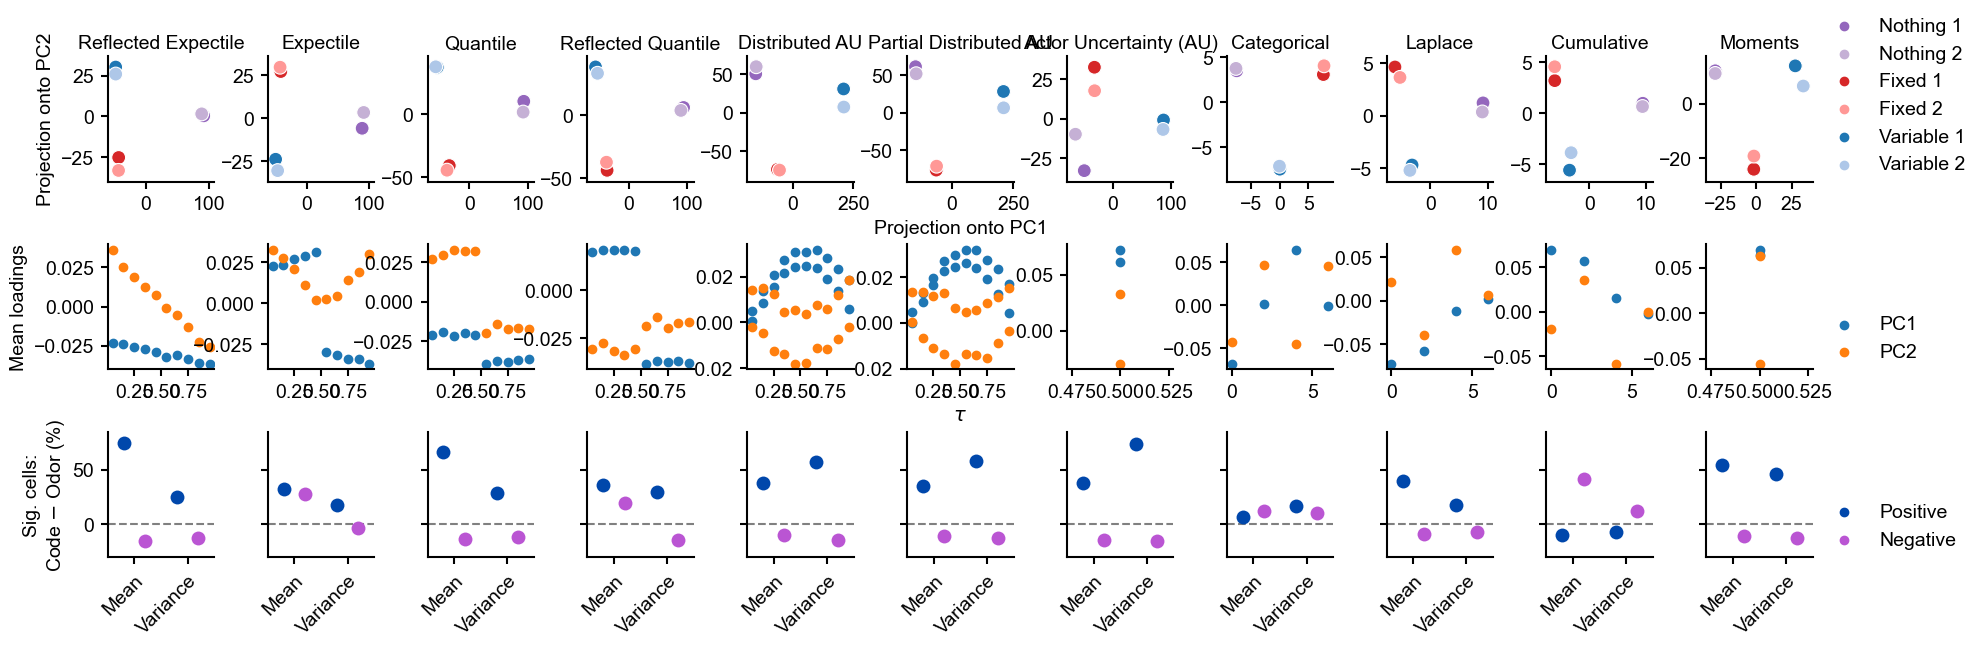

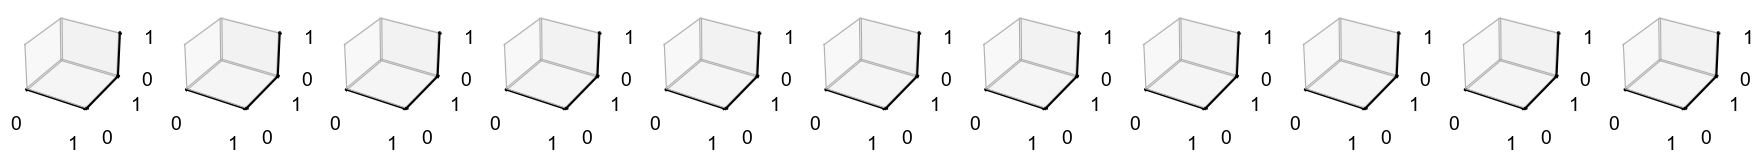

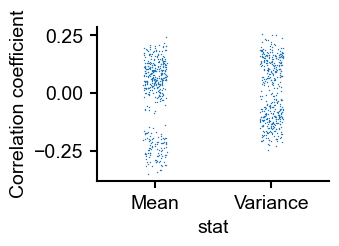

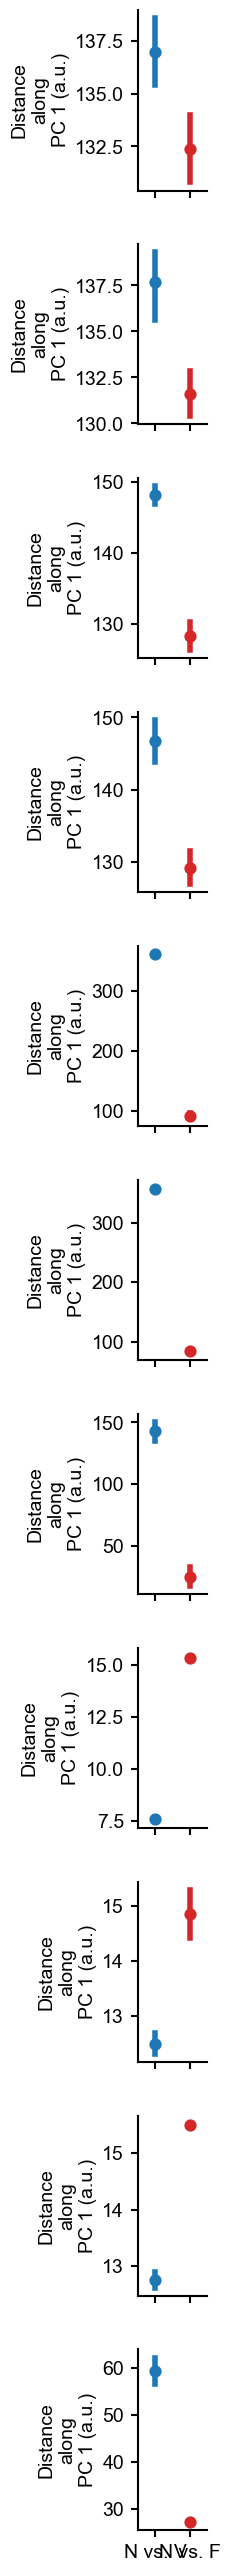

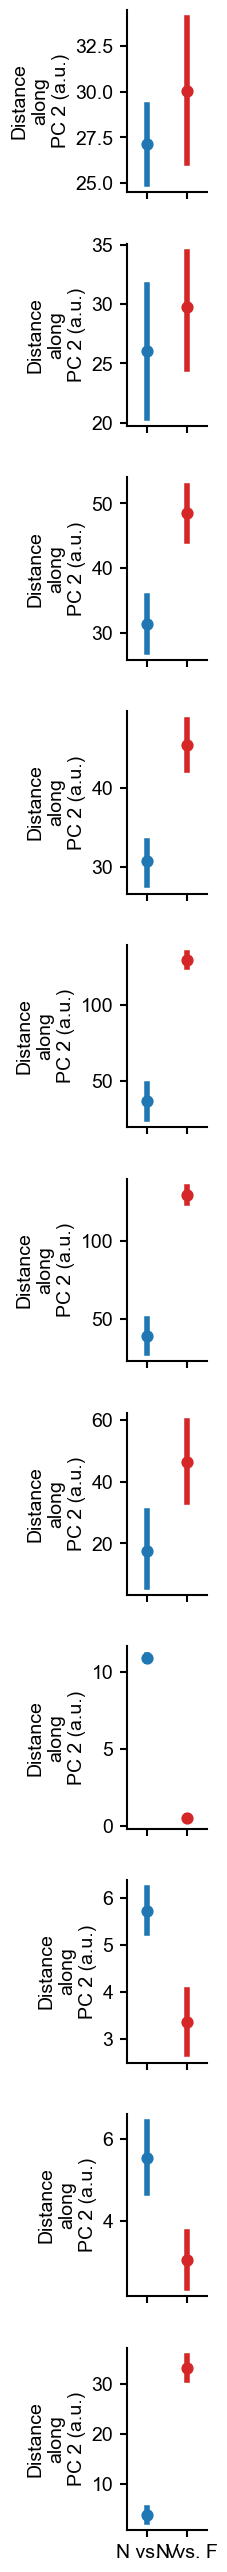

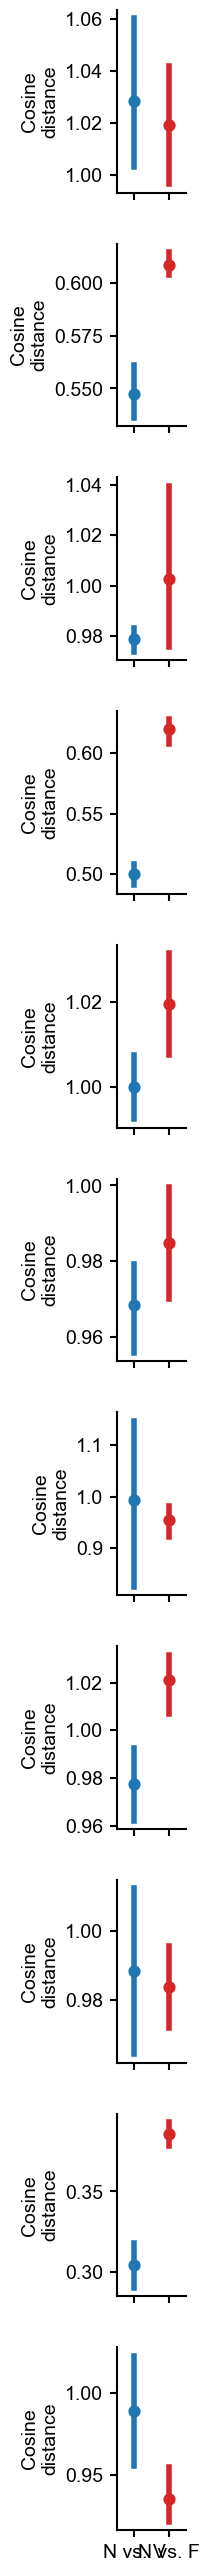

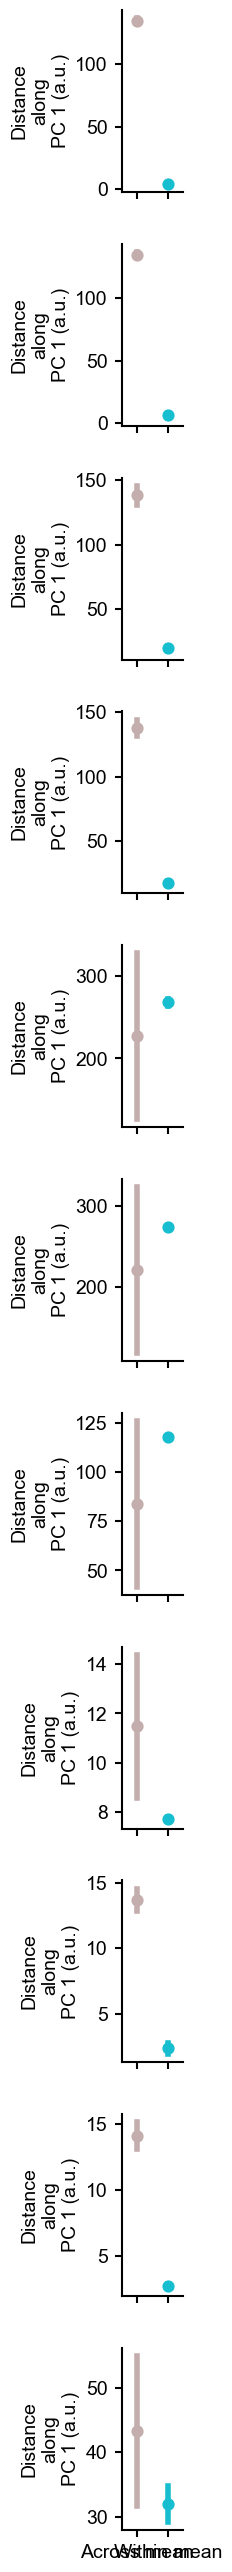

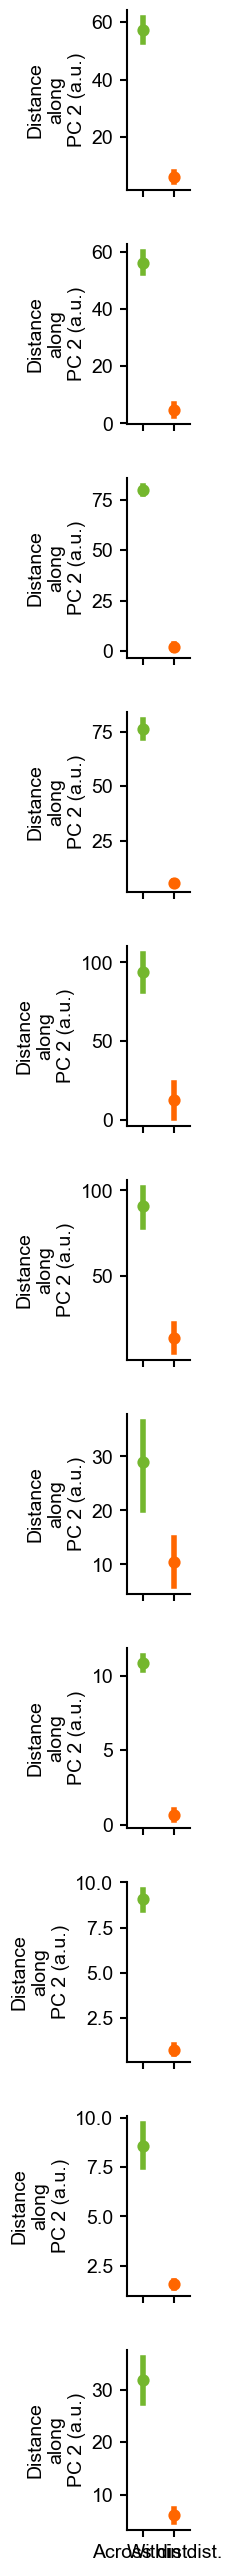

In [8]:
df_list, code_order, info, reduced_activities, all_dists, all_rda = generate_model_predictions(
    protocol_info, colors, cat=True, n_components=2, noise_scale=5, plot_detail=False)
model_palette = sns.husl_palette(len(code_order)-1, l=.5, h=.9)

In [ ]:
# plot correlation of PC1 with mean and PC2 with variance
n_codes = len(code_order)
fig, axs = plt.subplots(2, len(code_order), figsize=(2 * n_codes, 4.5), gridspec_kw={'wspace': .5, 'hspace': .5})
corrs = np.zeros((2, n_codes))
for i_code, (reduced_activity, code_name) in enumerate(zip(reduced_activities[0], code_order)):
    axs[0, i_code].scatter(protocol_info['mean'][:n_trace_types], reduced_activity[0], color=colors['colors'][:n_trace_types])
    corrs[0, i_code] = stats.pearsonr(protocol_info['mean'][:n_trace_types], reduced_activity[0])[0]
    axs[1, i_code].scatter(protocol_info['var'][:n_trace_types], reduced_activity[1], color=colors['colors'][:n_trace_types])
    corrs[1, i_code] = stats.pearsonr(protocol_info['var'][:n_trace_types], reduced_activity[1])[0]
plt.figure(figsize=(1.5, 1.5))
plt.scatter(protocol_info['mean'][:n_trace_types], protocol_info['var'][:n_trace_types], color=colors['colors'][:n_trace_types])
plt.xlabel('Mean')
plt.ylabel('Variance')
hide_spines()

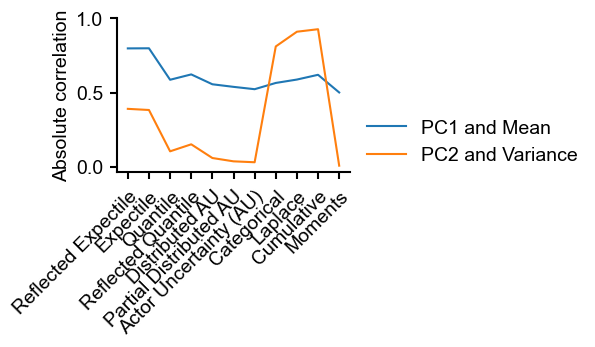

In [8]:
plt.plot(np.arange(n_codes), np.abs(corrs.T))
plt.xticks(np.arange(n_codes), code_order, rotation=45, ha='right', rotation_mode='anchor')
plt.yticks([0, .5, 1])
plt.ylabel('Absolute correlation')
plt.legend(['PC1 and Mean', 'PC2 and Variance'], loc=(1.04, 0))
hide_spines()

In [8]:
rel_nostim_dfs = []
for use_df, sup in zip(df_list, code_order):
    use_df['Model'] = sup
    df_rel_nostim = use_df.copy()
    nostim_value = np.repeat(df_rel_nostim.loc[df_rel_nostim['Manipulation'] == 'No Stimulation', 'Mean'], 3).values
    nostim_variance = np.repeat(df_rel_nostim.loc[df_rel_nostim['Manipulation'] == 'No Stimulation', 'Variance'], 3).values
    df_rel_nostim['Mean'] -= nostim_value
    df_rel_nostim['Variance'] -= nostim_variance
    df_rel_nostim = df_rel_nostim[df_rel_nostim['Manipulation'] != 'No Stimulation']
    df_rel_nostim['excitation'] =  df_rel_nostim['Manipulation']
    df_rel_nostim.loc[df_rel_nostim['excitation'] == 'Excitation', 'excitation'] = True
    df_rel_nostim.loc[df_rel_nostim['excitation'] == 'Inhibition', 'excitation'] = False
    rel_nostim_dfs.append(df_rel_nostim)

/n/holystore01/LABS/uchida_users/Users/alowet/envs/behavior/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
meta NOT subset; don't know how to subset; dropped
/n/holystore01/LABS/uchida_users/Users/alowet/envs/behavior/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
meta NOT subset; don't know how to subset; dropped


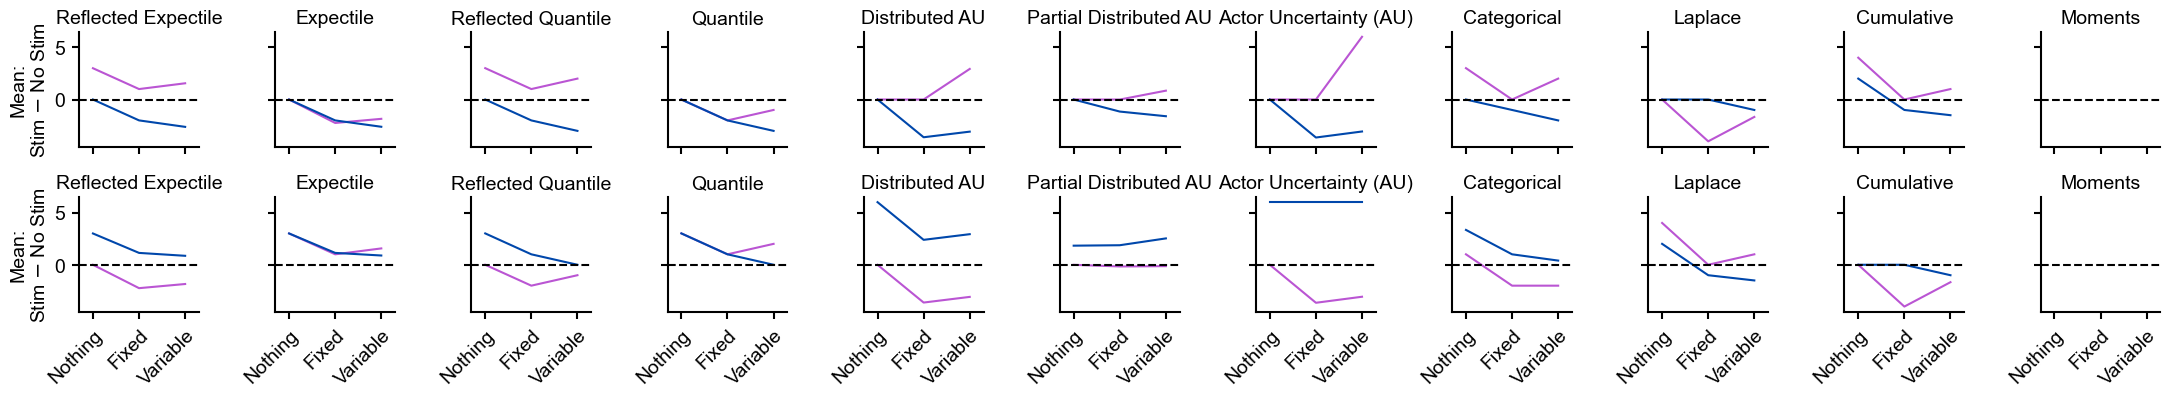

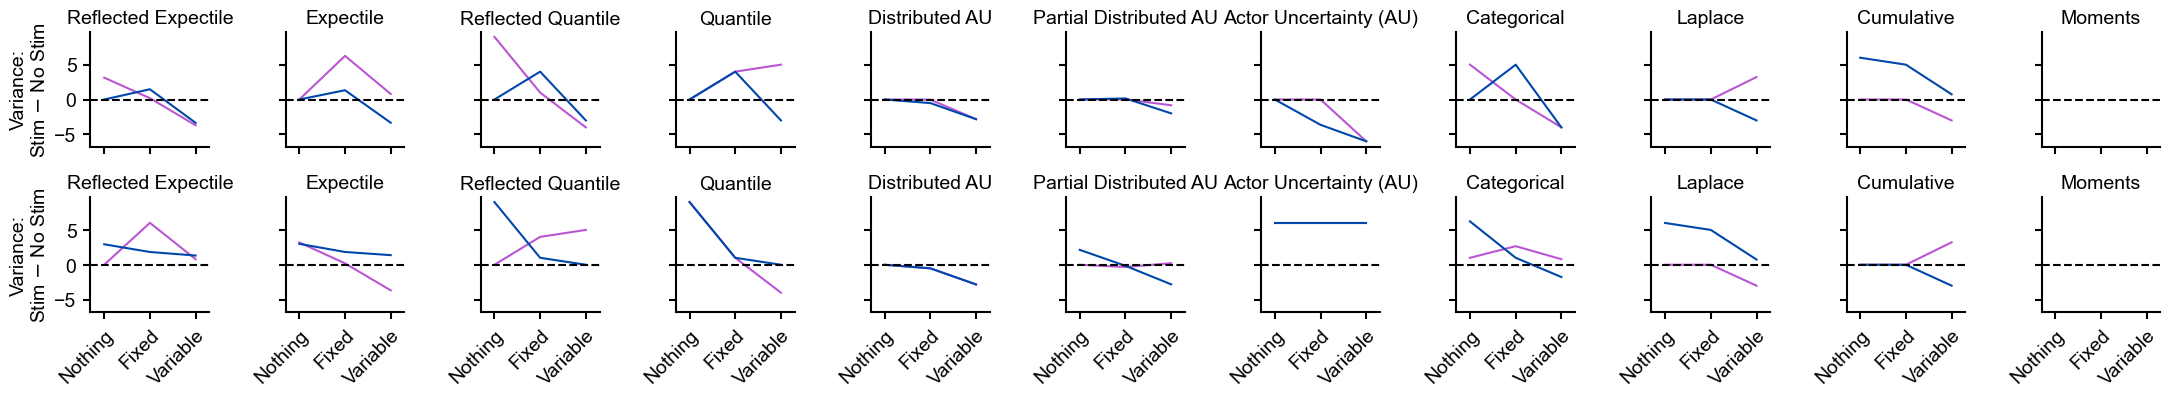

In [20]:
# prot = 'SameRewDist'
plot_model_predictions(rel_nostim_dfs, code_order, opt_palette, protocol)